# Enter input file names here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec
%matplotlib notebook 

In [2]:
pd.read_excel

<function pandas.io.excel._base.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True, **kwds)>

## PDF Calling

In [5]:
Cu7PSe6_PDF = pd.read_excel('Cu7PSe6 PDF 00-033-0482.xlsx',                
        #userows='1:10'
        names=['2q','Intensity'])

# Example of a PDF for Cu7PSe6. IF you want the excel to see how it 
# should be set up to properly call the file, let me know!!

In [3]:
Se_PDF = pd.read_excel('Se PDF 00-042-1425.xlsx',  #excel file where data is located                                 #selects the last sheet in the excel workbook to be used
        usecols='A,B', #these are the columns in the excel sheet that data is loaded from
        #userows='1:10'
        names=['2q','Intensity'])          #variable names corresponding to each data column

#print(Se_PDF)

In [4]:
Cu3PSe4_PDF = pd.read_excel('Cu3PSe4 PDF 04-006-8347.xlsx',  #excel file where data is located                                #selects the last sheet in the excel workbook to be used
        usecols='A,B', #these are the columns in the excel sheet that data is loaded from
        #userows='1:10'
        names=['2q','Intensity'])          #variable names corresponding to each data column

#print(Cu3PSe4_PDF)

In [6]:
Cu3P_PDF = pd.read_excel('Cu3P PDF 01-071-2261.xlsx',                                 #selects the last sheet in the excel workbook to be used
        usecols='A,C', #these are the columns in the excel sheet that data is loaded from
        #userows='1:10'
        names=['2q','Intensity'])          #variable names corresponding to each data column

#print(Cu3P_PDF)

## Data 

In [22]:
LTM_01_04_Cu3P = pd.read_csv('Cu3P_2021_06-03_LTM-01-04.txt',
                 sep="\s+",
                 header=2,
                 names=["2q", "y_exp"])
print(LTM_01_04_Cu3P)


# Example of a PDF for Cu7PSe6. IF you want the excel to see how it 
# should be set up to properly call the file, let me know!!

           2q   y_exp
0     24.0205  1547.0
1     24.0409  1565.0
2     24.0613  1612.0
3     24.0818  1589.0
4     24.1022  1591.0
...       ...     ...
1759  59.9281   740.0
1760  59.9485   753.0
1761  59.9690   782.0
1762  59.9894   827.0
1763  60.0098   738.0

[1764 rows x 2 columns]


<IPython.core.display.Javascript object>


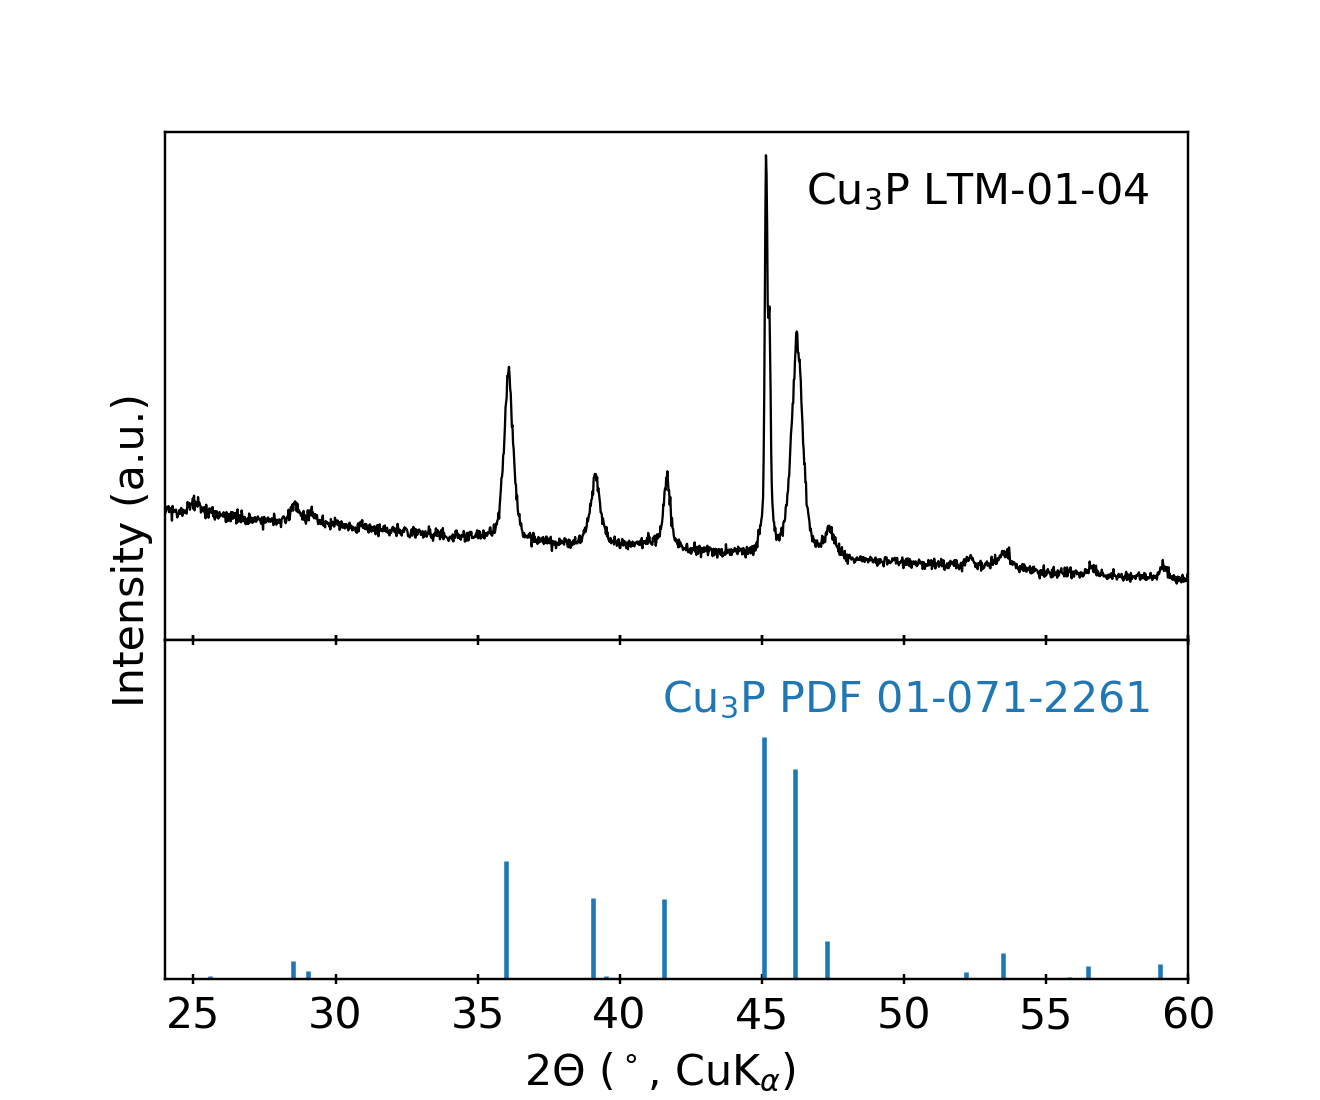

In [41]:
import matplotlib.colors as mcolors
fig = plt.figure(figsize=(6,5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1.5,1]) #rows, columns, [ht ratios] 
gs.update(wspace=0.025, hspace=0.0) # set the spacing between axes. 
#axs = gs.subplots(sharex=True, sharey=True)
plt.xlim(25,60)
#plt.xlabel('$2\Theta$ ($^\circ$, CuK$_{\\alpha}$)',fontsize=18)
#plt.ylabel('Intensity (a.u.)',fontsize=18)
legLoc = 'upper right'

ax1 = plt.subplot(gs[0])
x = LTM_01_04_Cu3P['2q']
y = LTM_01_04_Cu3P['y_exp']
ax1.set_xlim(24, 60)
ax1.set_ylim(50,6000)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.plot(x, y, lw=0.75, color = 'k', label = 'Cu$_3$P LTM-01-04')
ax1.tick_params(direction = 'inout', top = False, bottom = True, right = False, left = False)
ax1.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)

leg_1 = ax1.legend(handlelength=0, handletextpad=0, fancybox=False, frameon=False, fontsize=14)
for item in leg_1.legendHandles:
    item.set_visible(False)
for text in leg_1.get_texts():
    text.set_color("black")
    
#plt.title('Cu$_3$P', fontsize = 12)

ax2 = plt.subplot(gs[1])
x2 = Cu3P_PDF['2q']
y2 = Cu3P_PDF['Intensity']
ax2.set_xlim(24, 60)
ax2.set_ylim(0,1400)
#ax2.set_ylabel('Intensity (a.u.)')
ax2.set_xticklabels([20,25,30,35,40,45,50,55,60], fontsize=14)
ax2.set_yticklabels([])
ax2.vlines(x2,[0],y2, color = 'tab:blue', label = 'Cu$_3$P PDF 01-071-2261')
ax2.tick_params(direction = 'inout', top = True, bottom = True, right = False, left = False)
ax2.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)

leg_2 = ax2.legend(handlelength=0, handletextpad=0, fancybox=False, frameon=False, fontsize=14)
for item in leg_2.legendHandles:
    item.set_visible(False)
for text in leg_2.get_texts():
    text.set_color("tab:blue")
    
#x = Se_PDF['2q']
#y = Se_PDF['Intensity']
#plt.bar(x,y,align='center', color='k', width=0.25)
#set_shared_ylabel('$2\Theta$ ($^\circ$, CuK$_{\\alpha}$)', 'Intensity (a.u.)')
fig.text(.5, 0.025, '$2\Theta$ ($^\circ$, CuK$_{\\alpha}$)', ha='center', va='center', fontsize=14)
fig.text(0.1,.5, 'Intensity (a.u.)', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig("Cu3P_2021_06-03_LTM-01-04.pdf", dpi=10000)
plt.show()